In [146]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math as mth
from mpl_toolkits.mplot3d import Axes3D


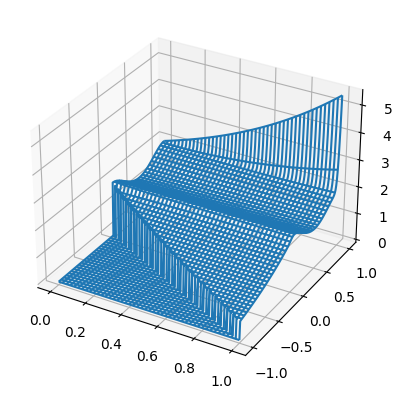

In [147]:

M = 180 # number of grid points for space interval
N = 91 # ''     '' ''   ''     ''  time ''

x0 = -1
xL = 1 # unit grid differences

dx = (xL - x0) / (M - 1) # space step

t0 = 0
tF = 1

dt = (tF - t0) / (N - 1)

D = 0.3 # thermal diffusivity

a = 0.1

# Create grid
tspan = np.linspace(t0, tF, N)
xspan = np.linspace(x0, xL, M)


# Initial matrix solution
U = np.zeros((N, M))

# Initial condition
U[0,:] = [2-10*xspan**2*(xspan-1)**2]*np.heaviside(xspan,1)
U[:,-1]=U[0, N-1]*np.exp(tspan)



for i in range(0, N-1):
    for k in range(1, M-1):
      if k==N-i-2:
        U[i+1, k] = U[0, N-1]*np.exp(-tspan[i+1])
      elif k<N-i-2:
        U[i+1, k]=0
      else:
        U[i+1, k] = (a * U[i, k-1] + (1 - 2 * a) * U[i, k] + a * U[i, k + 1])


Xspan, Tspan = np.meshgrid(xspan, tspan)

ax = plt.axes(projection ='3d')
ax.plot_wireframe(Tspan, Xspan, U)

plt.show()

